# Effects of Loan Charesteristics on Loan APR. 
## by Moses Alex

## Investigation Overview

> I want to explore the dataset to find out the factors that affects the APR of a loan. From the initial investigation it is found out APR is spread across 0.1. to 0.5 for each loan. 
## Dataset Overview
This document explores a dataset containing information of 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [10]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('loan.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Spread of Loan APR

> The slides gives the idea of how the loan APR is spread across different values.

Text(0.5, 1.0, ' Spread of APR')

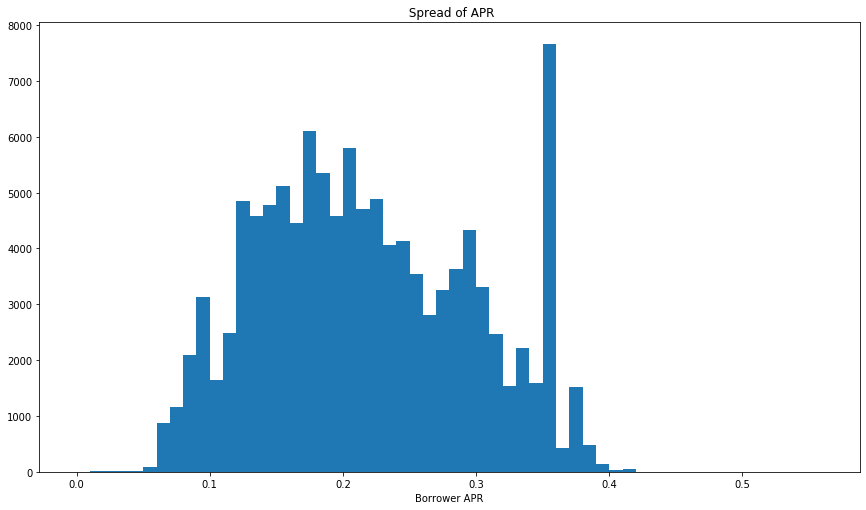

In [42]:
bins = np.arange(0, loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[14.70, 8.27])
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.title(' Spread of APR')

## Correlation between Numerical and Categorical variables. 

> The variables that are considered here
numeric variables = 'MonthlyLoanPayment', 'BorrowerAPR','LoanOriginalAmount']
categoric variables =  'ProsperRating (Alpha)', 'Income_Level','ListingCategory (numeric)'

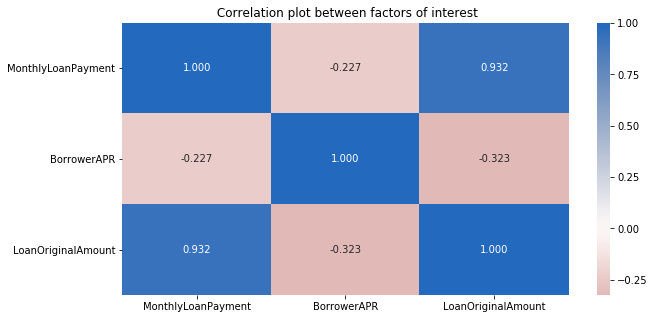

<Figure size 1058.4x595.44 with 0 Axes>

In [40]:
# correlation plot
numeric_vars = ['MonthlyLoanPayment', 'BorrowerAPR','LoanOriginalAmount']
categoric_vars = [ 'ProsperRating (Alpha)', 'Income_Level','ListingCategory (numeric)']
plt.figure(figsize = [10, 5])
ax = sb.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0 )
ax.set_yticklabels(ax.get_yticklabels(), rotation=360)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title(' Correlation plot between factors of interest')
plt.figure(figsize=[14.70, 8.27])
plt.show()

## Combination of Loan original amount and APR against other factors.

From the above plot, we see there is a negative correlation between loan original amount and Borrower APR. So we further look into other factors that affects the combination of both.



<Figure size 1058.4x595.44 with 0 Axes>

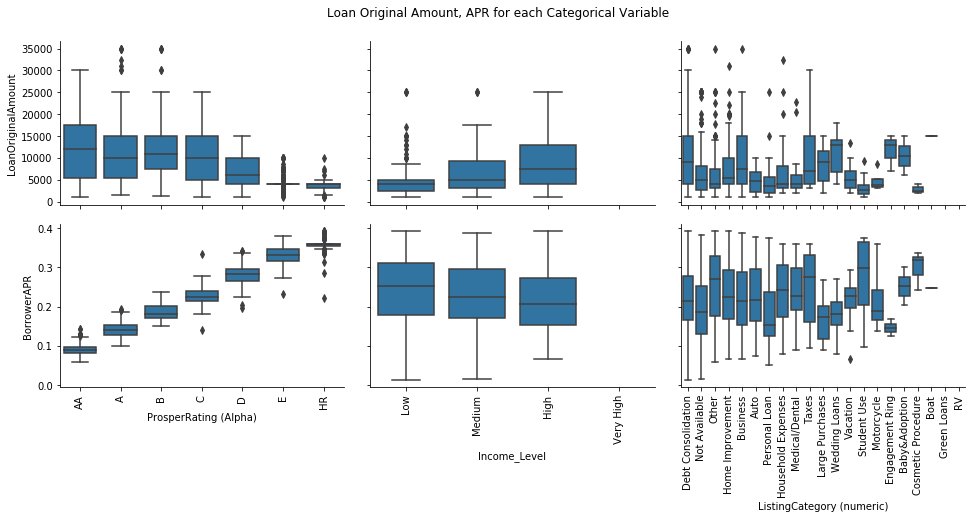

In [39]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.
# Convert each categoric vars  into ordered categorical types
list2 = ['Debt Consolidation', 'Not Available', 'Other', 'Home Improvement',
       'Business', 'Auto', 'Personal Loan', 'Household Expenses',
       'Medical/Dental', 'Taxes', 'Large Purchases', 'Wedding Loans',
       'Vacation', 'Student Use', 'Motorcycle', 'Engagement Ring',
       'Baby&Adoption', 'Cosmetic Procedure', 'Boat', 'Green Loans', 'RV']
ordered_list = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = list2)
loan['ListingCategory (numeric)'] = loan['ListingCategory (numeric)'].astype(ordered_list)
# Income. Level
income_order = ['Low', 'Medium', 'High', ' Very High']
ordered = pd.api.types.CategoricalDtype(ordered =True, categories = income_order)
loan['Income_Level'] = loan['Income_Level'].astype(ordered)
# Prosper Rating
list_order = list_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
prosper_list = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = list_order)
loan['ProsperRating (Alpha)'] = loan['ProsperRating (Alpha)'].astype(prosper_list)
samples = np.random.choice(loan.shape[0], 2000, replace = False)
loan_samp = loan.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation= 90)
plt.figure(figsize=[14.70, 8.27])
g = sb.PairGrid(data = loan_samp, y_vars = ['LoanOriginalAmount', 'BorrowerAPR'], x_vars = categoric_vars,
                size = 3, aspect = 1.5 )
g.map(boxgrid)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Loan Original Amount, APR for each Categorical Variable')
plt.show();

# Loan Orginal Amount vs APR  to different Prosper Ratings. 

We found the major factor affecting the correlation between APR and Loan Original Amount is the Prosper APR. We plot heat map to further understand this correlation. This plot shows irrespective of all other factors, loans with higher prosper rating tend to have very low APR. 

<Figure size 1058.4x595.44 with 0 Axes>

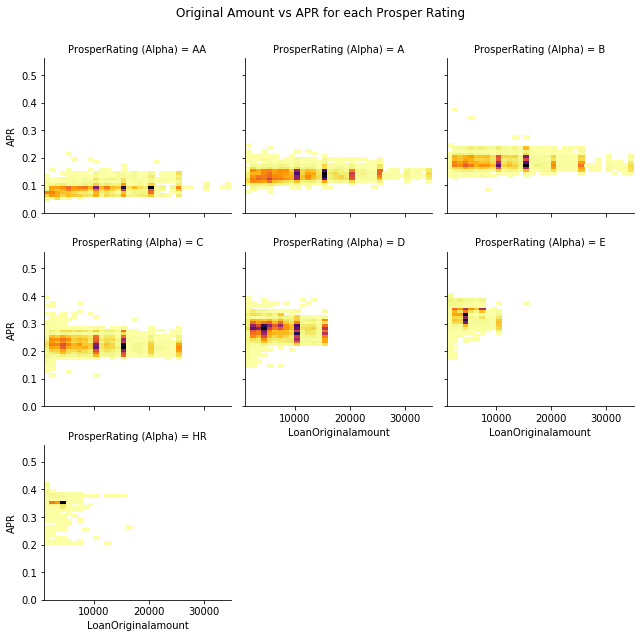

In [38]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_y = np.arange(0, loan.BorrowerAPR.max()+0.05, 0.01)
    bins_x = np.arange(1000, loan.LoanOriginalAmount.max()+200, 1000)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
# create faceted heat maps on levels of Prosper rating. 
plt.figure(figsize=[14.70, 8.27])
g = sb.FacetGrid(data = loan, col = 'ProsperRating (Alpha)', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'LoanOriginalAmount', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('LoanOriginalamount')
g.set_ylabels('APR')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Original Amount vs APR for each Prosper Rating')

plt.show()

In [ ]:
! jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle



[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 441669 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_template.slides.html
Use Control-C to stop this server
